In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import os
from PIL import Image
from scipy.cluster.hierarchy import linkage, dendrogram

2023-12-11 12:23:17.416580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
import plotly.figure_factory as ff

In [35]:
import json
with open('output.json', 'r') as file:
    data = json.load(file)

descriptions = [item['decription'] for item in data.values()]
keys = list(data.keys())

In [114]:
def compute_similarity_matrix(descriptions):
    descriptions = [' '.join(desc) for desc in descriptions]
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(descriptions)
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return similarity_matrix

In [119]:
def visualize_dendrogram(similarity_matrix, keys):
    # linkage_matrix = linkage(1 - similarity_matrix, method='single')
    # print(linkage_matrix)
    # plt.figure(figsize=(12, 8))
    # dendrogram(linkage_matrix, labels=keys, orientation='left')
    # plt.title('Hierarchical Clustering Dendrogram')
    # plt.xlabel('Distance between clusters')
    # plt.show()
    fig = ff.create_dendrogram(similarity_matrix, orientation='left', labels=keys)
    fig.update_layout({'width':700, 'height':500}) 
    fig.show()

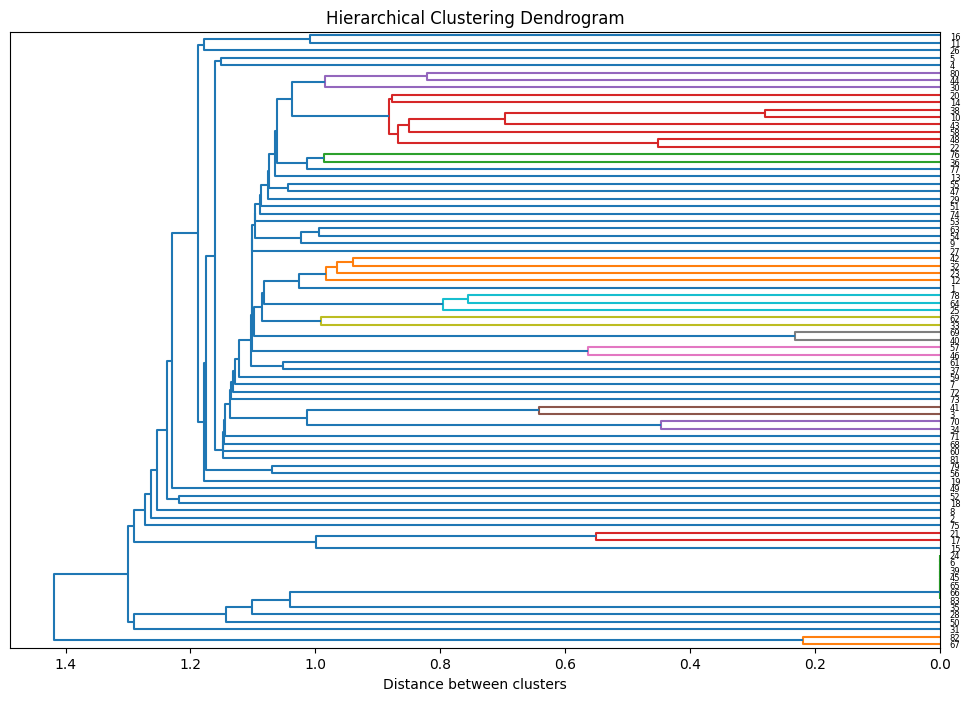

In [120]:
similarity_matrix = compute_similarity_matrix(descriptions)
visualize_dendrogram(similarity_matrix, keys=keys)